In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
mart_data=pd.read_csv('big_mart.csv')

In [3]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
mart_data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [6]:
print(mart_data.loc[mart_data['Item_Type'] == 'Dairy', ['Item_Weight', 'Item_Type']])

      Item_Weight Item_Type
0           9.300     Dairy
11         18.500     Dairy
19         13.350     Dairy
28          5.925     Dairy
30         19.250     Dairy
...           ...       ...
8424        7.405     Dairy
8447       20.350     Dairy
8448       14.300     Dairy
8457        5.800     Dairy
8512       20.700     Dairy

[682 rows x 2 columns]


In [7]:
mart_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [8]:
mart_data.loc[mart_data['Item_Type']=='Diary','Item_Weight']=(
    mart_data.loc[mart_data['Item_Type']=='Diary','Item_Weight'].fillna(
        mart_data.loc[mart_data['Item_Type']=='DIary','Item_Weight'].mean(),inplace=True
    )
)

In [9]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
mart_data.loc[mart_data['Item_Type']=='Diary','Item_Weight'].isnull().sum()

np.int64(0)

In [11]:
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(),inplace=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_36856\3050664050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(),inplace=True)


In [12]:
mart_data['Item_Weight'].isnull().sum()

np.int64(0)

In [13]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [15]:
# mart_data.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)

In [16]:
mode_of_o_size=mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [17]:
print(mode_of_o_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [18]:
missing_values=mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
mart_data.loc[missing_values,'Outlet_Size']=mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_o_size)

In [20]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
sns.set()

<Figure size 600x600 with 0 Axes>

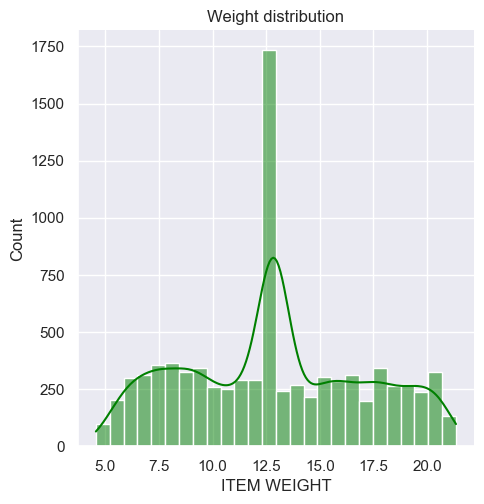

In [23]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Weight'],kde=True,color='Green')
plt.xlabel("ITEM WEIGHT")
plt.title('Weight distribution')
plt.show()

In [24]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

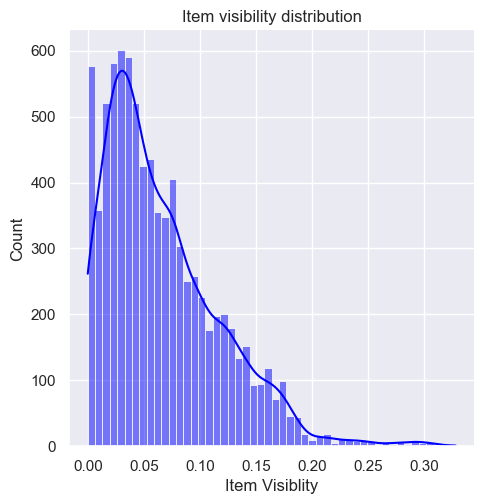

In [25]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Visibility'],color='Blue',kde=True)
plt.title("Item visibility distribution")
plt.xlabel("Item Visiblity")
plt.show()

<Figure size 800x800 with 0 Axes>

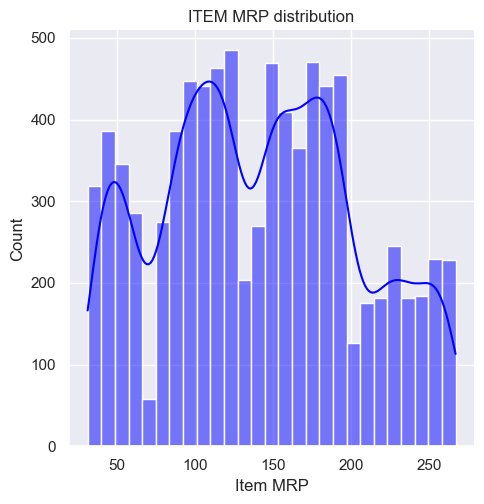

In [26]:
plt.figure(figsize=(8,8))
sns.displot(mart_data['Item_MRP'],color='Blue',kde=True)
plt.title("ITEM MRP distribution")
plt.xlabel("Item MRP")
plt.show()

C:\Users\swapn\AppData\Local\Temp\ipykernel_36856\1801029137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mart_data,x='Outlet_Establishment_Year',palette='Set1')


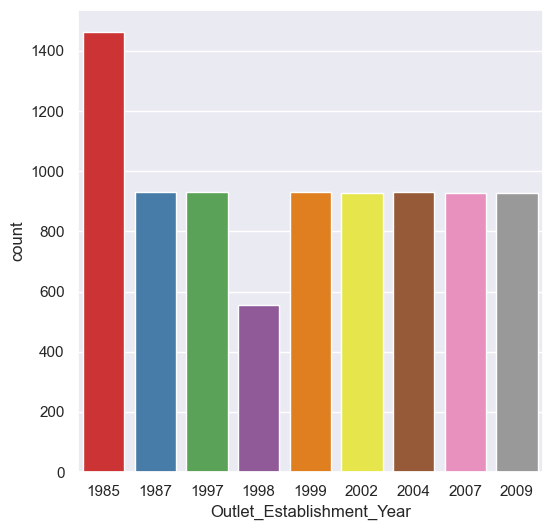

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(data=mart_data,x='Outlet_Establishment_Year',palette='Set1')
plt.show()


C:\Users\swapn\AppData\Local\Temp\ipykernel_36856\240863835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mart_data,x='Item_Fat_Content',palette='Set1')


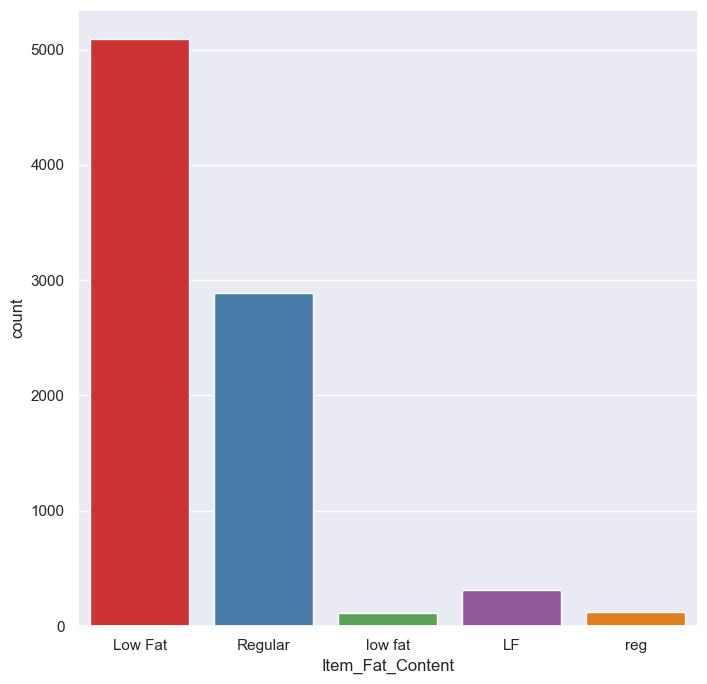

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(data=mart_data,x='Item_Fat_Content',palette='Set1')
plt.show()

In [29]:
mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [30]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

C:\Users\swapn\AppData\Local\Temp\ipykernel_36856\2247744762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mart_data,x='Item_Type',palette='Set2')


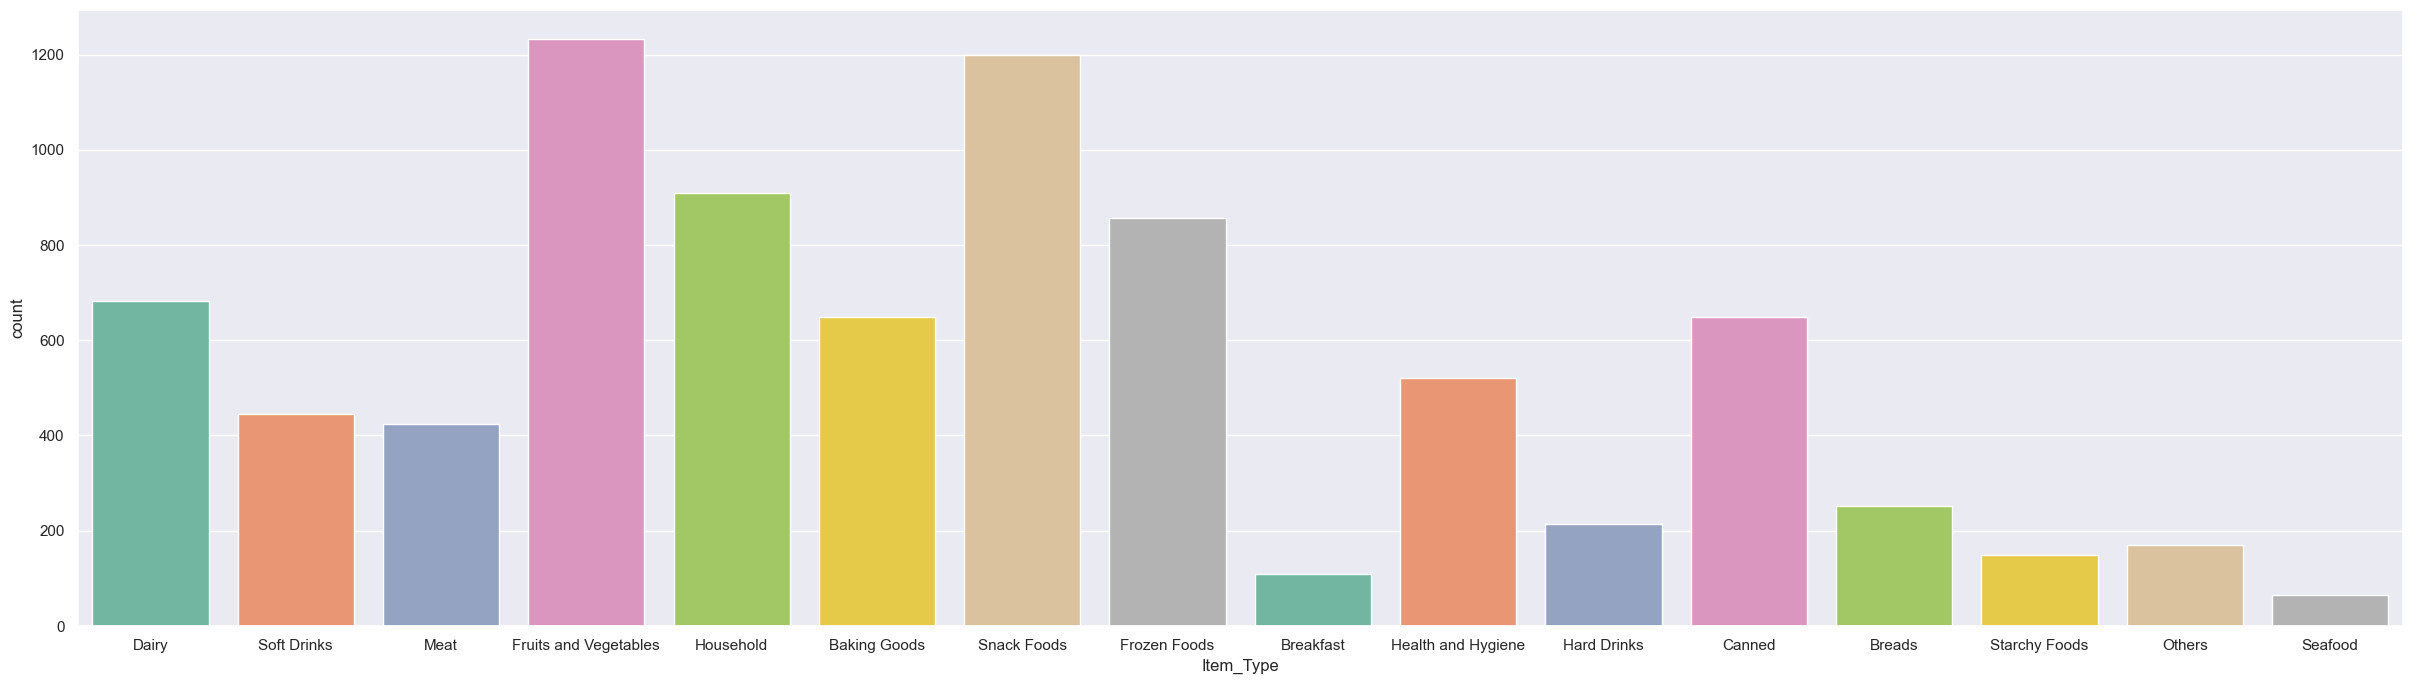

In [31]:
plt.figure(figsize=(30,8))
sns.countplot(data=mart_data,x='Item_Type',palette='Set2')
plt.show()

In [32]:
encoder=LabelEncoder()

In [33]:
mart_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
mart_data['Outlet_Size']

0                                                  Medium
1                                                  Medium
2                                                  Medium
3       Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                    High
                              ...                        
8518                                                 High
8519    Outlet_Type Grocery Store Supermarket Type1 Su...
8520                                                Small
8521                                               Medium
8522                                                Small
Name: Outlet_Size, Length: 8523, dtype: object

In [35]:
mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium                                                                                                                                                                                                2793
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium      2410
Small                                                                                                                                                                                                 2388
High                                                                                                                                                                                                   932
Name: count, dtype: int64

In [36]:
mart_data['Item_Identifier']=encoder.fit_transform(mart_data['Item_Identifier'])
mart_data['Item_Fat_Content']=encoder.fit_transform(mart_data['Item_Fat_Content'])
mart_data['Item_Type']=encoder.fit_transform(mart_data['Item_Type'])
mart_data['Outlet_Identifier']=encoder.fit_transform(mart_data['Outlet_Identifier']) 
mart_data['Outlet_Size'] = mart_data['Outlet_Size'].astype(str)
mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])
mart_data['Outlet_Location_Type']=encoder.fit_transform(mart_data['Outlet_Location_Type'])
mart_data['Outlet_Type']=encoder.fit_transform(mart_data['Outlet_Type'])

In [37]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [38]:
x=mart_data.drop(['Item_Outlet_Sales'],axis=1)
y=mart_data['Item_Outlet_Sales']

In [39]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [40]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=1,test_size=0.2)


In [41]:
model=XGBRegressor()
model.fit(train_x,train_y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
pred_val=model.predict(train_x)


In [43]:
r2train=metrics.r2_score(train_y,pred_val)
print(r2train)

0.8822117283002253


In [44]:
test_pred=model.predict(test_x)


In [45]:
r2test=metrics.r2_score(test_y,test_pred)
print(r2test)

0.499229624877799


In [46]:
mae_train=metrics.mean_absolute_error(train_y,pred_val)
mae_test=metrics.mean_absolute_error(test_y,test_pred)

In [47]:
print("Train mae:",mae_train)
print("Test mae:",mae_test)

Train mae: 422.157285752855
Test mae: 847.1587047913631


In [48]:
new_data=pd.read_csv('mart_test.csv')


In [49]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [50]:
new_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [51]:
new_data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [52]:
new_data['Item_Fat_Content'].isnull().sum()

np.int64(0)

In [53]:
new_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [54]:
new_data['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [55]:
new_data['Item_Weight'].fillna(new_data['Item_Weight'].mean(),inplace=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_36856\327393580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Item_Weight'].fillna(new_data['Item_Weight'].mean(),inplace=True)


In [56]:
new_data['Item_Weight'].isnull().sum()

np.int64(0)

In [57]:
new_data['Item_Weight']

0       20.750000
1        8.300000
2       14.600000
3        7.315000
4       12.695633
          ...    
5676    10.500000
5677     7.600000
5678    10.000000
5679    15.300000
5680     9.500000
Name: Item_Weight, Length: 5681, dtype: float64

In [58]:
new_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [59]:
mode_o_size=new_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
miss_values=new_data['Outlet_Size'].isnull()
new_data.loc[miss_values,'Outlet_Size']=new_data.loc[miss_values,'Outlet_Size'].apply(lambda x:mode_o_size)

In [60]:
new_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [61]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [62]:
new_data['Outlet_Size'].value_counts()

Outlet_Size
Medium                                                                                                                                                                                                1862
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium      1606
Small                                                                                                                                                                                                 1592
High                                                                                                                                                                                                   621
Name: count, dtype: int64

In [63]:
new_data['Item_Identifier']=encoder.fit_transform(new_data['Item_Identifier'])
new_data['Item_Fat_Content']=encoder.fit_transform(new_data['Item_Fat_Content'])
new_data['Item_Type']=encoder.fit_transform(new_data['Item_Type'])
new_data['Outlet_Identifier']=encoder.fit_transform(new_data['Outlet_Identifier']) 
new_data['Outlet_Size'] = new_data['Outlet_Size'].astype(str)
new_data['Outlet_Size'] = encoder.fit_transform(new_data['Outlet_Size'])
new_data['Outlet_Location_Type']=encoder.fit_transform(new_data['Outlet_Location_Type'])
new_data['Outlet_Type']=encoder.fit_transform(new_data['Outlet_Type'])

In [64]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [65]:
predictions=model.predict(new_data)

In [66]:
new_data['Item_Outlet_Sales']=predictions

In [67]:
new_data.to_csv('predicted_sales_big_mart.csv',index=False)